# 학습 전 폴더 구조
```bash
├── BERT/                     
    ├── bert_test.py                               - 실행파일
    │ 
    ├── src/                                       - BERT 공식 코드 폴더
    │   ├── make_vocab/                            
    │   │          └── wordpiece.py                - BERT vocab 생성 코드
    │   │          
    │   ├── make_preprocessed_data/  
    │   │          ├── tokenization.py             - 학습데이터 전처리 코드
    │   │          └── create_pretraining_data.py  - 학습데이터 전처리 코드
    │   │          
    │   └── make_bert_model/                       - BERT 학습 코드
    │              ├── tokenization.py  
    │              ├── run_squad.py                - KorQuAD 학습에 필요한 파일
    │              ├── run_pretraining.py  
    │              ├── run_multi_classifier.py     - 관계 추출 실습에 필요한 파일
    │              ├── run_classifier.py           - 감정분류 학습에 필요한 파일  
    │              ├── optimization.py  
    │              ├── modeling.py  
    │              ├── extract_features.py  
    │              └── evaluate.py     
    │ 
    └── rsc/               
        ├── trainig_data/                         - 학습할 데이터
        │     ├── wiki_20190620.txt
        │     └── wiki_20190620_small.txt
        │
        ├── preprocessed_training_data/           - output 폴더
        │     └── wiki_20190620_512_tf.record     - 테스트를 위해 미리 생성한 데이터
        │
        ├── my_pretrained_model/                  - output 폴더
        ├── my_conf/                              - output 폴더
        ├── my_preprocessed_training_data/        - output 폴더
        └── conf/   
              └── bert_config.json

                    
     
```


## 1. 구글 드라이브 저장소 설정

In [0]:
# 구글드라이브의 디렉토리와 Colab 연동
# colab 좌측 상단 메뉴, 런타임 -> 런타임 유형 변경 -> 하드웨어 가속기 -> GPU 선택 후 저장
!nvidia-smi

Mon Mar 30 04:19:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    13W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
# 내 구글 드라이브 저장소와 colab연결
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# 연결된 내 드라이브 안에 디렉토리 확인
! ls

drive  sample_data


In [0]:
# bert실행 파일들을 저장한 폴더 안의 디렉토리/파일 확인
!ls drive/My\ Drive/Colab\ Notebooks/BERT/

rsc  src


## 2. BERT 학습을 위한 vocab 만들기
- wiki_20190620_small.txt 파일을 wordpiece.py로 my_vacab.txt 생성

In [0]:
# BERT학습을 위한 vocab 만들기
!python drive/My\ Drive/Colab\ Notebooks/BERT/src/make_vocab/wordpiece.py \
--corpus=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/training_data/wiki_20190620_small.txt \
--iter=100 \
--fname=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/my_conf/my_vocab.txt

terminated vocabulary scanning
('##다', '##.')
('##으', '##로')
('##에', '##서')
('있', '##다.')
('1', '##9')
('##o', '##r')
('##l', '##a')
('##u', '##la')
('##or', '##m')
('##orm', '##ula')
('f', '##ormula')
('##이', '##다.')
('##하', '##는')
('##었', '##다.')
('##하', '##였')
('##하', '##여')
('##0', '##0')
('##고', '##,')
('##했', '##다.')
('대', '##한')
('##며', '##,')
('##한', '##다.')
('##에', '##는')
('##하였', '##다.')
('##적', '##인')
('##하', '##고')
('다', '##음')
('사', '##용')
('##라', '##고')
('##적', '##으로')
('2', '##00')
('##부', '##터')
('있', '##는')
('##되', '##었다.')
('##지', '##만')
('한', '##다.')
('##다', '##는')
('같', '##은')
('따', '##라')
('##0', '##년')
('##라', '##는')
('다음', '##과')
('##하', '##기')
('formula', '##1')
('##무', '##현')
('##다', '##고')
('##으', '##며,')
('또', '##한')
('##민', '##국')
('노', '##무현')
('##까', '##지')
('##에서', '##는')
('##들', '##이')
('##들', '##은')
('2', '##0')
('##면', '##서')
('이', '##후')
('대한', '##민국')
('##통', '##령')
('##정', '##식')
('일', '##본')
('##이', '##나')
('경', '##우')
('대', '##통령')
('운', '##동')
('

## 3. 데이터 전처리
- 데이터 : wiki_20190620_small.txt, my_vocab.txt
- 모듈 : create_pretraining_data.py
- 파라미터 : do_lower_case=False, max_seq_length=512
- output : my_preprocessed_training_data/wiki_20190620_small_512_tf.record

In [0]:
!python drive/My\ Drive/Colab\ Notebooks/BERT/src/make_preprocessed_data/create_pretraining_data.py \
--input_file=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/training_data/wiki_20190620_small.txt \
--vocab_file=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/my_conf/my_vocab.txt \
--do_lower_case=False \
--max_seq_length=512 \
--output_file=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/my_preprocessed_training_data/wiki_20190620_small_512_tf.record



W0326 07:07:39.698944 139959146669952 module_wrapper.py:139] From drive/My Drive/Colab Notebooks/BERT/src/make_preprocessed_data/create_pretraining_data.py:437: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.


W0326 07:07:39.699160 139959146669952 module_wrapper.py:139] From drive/My Drive/Colab Notebooks/BERT/src/make_preprocessed_data/create_pretraining_data.py:437: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.


W0326 07:07:39.699302 139959146669952 module_wrapper.py:139] From /content/drive/My Drive/Colab Notebooks/BERT/src/make_preprocessed_data/tokenization.py:125: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0326 07:07:39.709002 139959146669952 module_wrapper.py:139] From drive/My Drive/Colab Notebooks/BERT/src/make_preprocessed_data/create_pretraining_data.py:444: The name tf.gfile.Glob is deprecated. Please use tf.io.gfile.glob instead.


W0326 

## 4-1. BERT PRE-TRAIN(small version)
- 위 코드에서는 wiki_20190620_small.txt를 전처리하여 wiki_20190620_small_512_tf.record 레코드를 생성하였습니다. 이를 가지고 훈련.
- 데이터 : 위 코드에서 전처리한 wiki_20190620_small_512_tf.record
- output : 사전훈련된 모델, 저장 위치 : my_pretrained_model/
- 파라미터 :<br> train_batch_size=4, max_seq_length=512, max_predidtions_per_seq=20, <br> num_train_steps=10, learning_rate=1e-4, <br>
save_checkpoints_steps=5, do_lower_case=False

In [0]:
!python drive/My\ Drive/Colab\ Notebooks/BERT/src/make_bert_model/run_pretraining.py \
--input_file=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/my_preprocessed_training_data/wiki_20190620_small_512_tf.record \
--output_dir=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/my_pretrained_model \
--do_train=True \
--do_eval=True \
--bert_config_file=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/conf/bert_config.json \
--train_batch_size=4 \
--max_seq_length=512 \
--max_predictions_per_seq=20 \
--num_train_steps=10 \
--learning_rate=1e-4 \
--save_checkpoints_steps=5 \
--do_lower_case=False

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2020-03-26 07:09:53.473886: I tensorflow/core/common_runtime/bfc_allocator.cc:905] InUse at 0x7f76fac05600 next 8 of size 3072
2020-03-26 07:09:53.473898: I tensorflow/core/common_runtime/bfc_allocator.cc:905] InUse at 0x7f76fac06200 next 9 of size 256
2020-03-26 07:09:53.473911: I tensorflow/core/common_runtime/bfc_allocator.cc:905] InUse at 0x7f76fac06300 next 10 of size 3072
2020-03-26 07:09:53.473924: I tensorflow/core/common_runtime/bfc_allocator.cc:905] InUse at 0x7f76fac06f00 next 11 of size 3072
2020-03-26 07:09:53.473936: I tensorflow/core/common_runtime/bfc_allocator.cc:905] InUse at 0x7f76fac07b00 next 12 of size 256
2020-03-26 07:09:53.473948: I tensorflow/core/common_runtime/bfc_allocator.cc:905] InUse at 0x7f76fac07c00 next 13 of size 256
2020-03-26 07:09:53.473960: I tensorflow/core/common_runtime/bfc_allocator.cc:905] InUse at 0x7f76fac07d00 next 15 of size 256
2020-03-26 07:09:53.474868: I tensorflow/core/common_runtime/bfc_allocator

## my_pretrained_model/ 에 생성된 사전 훈련 모델


---
<br>


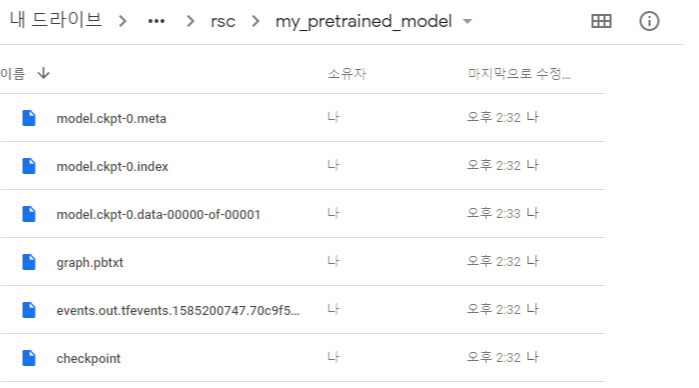## 



## 4-2. BERT PRE-TRAIN(big version)
- 큰 위키 데이터로 미리 생성해놓은 wiki_20190620_512_tf.record 파일로 훈련.
- 파라미터는 위 코드쉘과 동일하며, <br>
train_batch_size를 4보다 크게 하면, colab에서 제공하는 GPU로는 메모리가 부족하여 에러가 발생.


In [0]:
!python drive/My\ Drive/Colab\ Notebooks/BERT/src/make_bert_model/run_pretraining.py \
--input_file=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/preprocessed_training_data/wiki_20190620_512_tf.record \
--output_dir=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/my_pretrained_model_big \
--do_train=True \
--do_eval=True \
--bert_config_file=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/conf/bert_config.json \
--train_batch_size=4 \
--max_seq_length=512 \
--max_predictions_per_seq=20 \
--num_train_steps=10 \
--learning_rate=1e-4 \
--save_checkpoints_steps=5 \
--do_lower_case=False




W0326 07:49:58.006206 140646457186176 module_wrapper.py:139] From drive/My Drive/Colab Notebooks/BERT/src/make_bert_model/run_pretraining.py:407: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.


W0326 07:49:58.006421 140646457186176 module_wrapper.py:139] From drive/My Drive/Colab Notebooks/BERT/src/make_bert_model/run_pretraining.py:407: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.


W0326 07:49:58.006567 140646457186176 module_wrapper.py:139] From /content/drive/My Drive/Colab Notebooks/BERT/src/make_bert_model/modeling.py:93: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0326 07:49:58.008314 140646457186176 module_wrapper.py:139] From drive/My Drive/Colab Notebooks/BERT/src/make_bert_model/run_pretraining.py:414: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0326 07:49:58.008764 140646457186176 module_wrapper.p


```bash
function ClickConnect() {
    var buttons = document.querySelectorAll("colab-dialog.yes-no-dialog paper-button#cancel");
    buttons.forEach(function(btn) {
        btn.click();
    });
    console.log("1분마다 자동 재연결");
    document.querySelector("colab-toolbar-button#connect").click();
}
setInterval(ClickConnect, 1000 * 60);

```

## 5. Fine-Tuning1 - KorQuAD 학습
- BERT run_squad.py
- 데이터 : KorQuAD 1.0 데이터
- output : KorQuAD/output/
- 파라미터 : do_train=True, do_predict=True,<br>
train_batch_size=16, learning_rate=2e-5,<br>
num_train_epochs=1.0, max_seq_length=128,<br>
doc_stride=128, do_lower_case=False


In [3]:
pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 1.2MB/s 
     |████████████████████████████████| 3.2MB 52.9MB/s 
     |████████████████████████████████| 491kB 54.4MB/s 
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc1
    Uninstalling tensorflow-2.2.0rc1:
      Successfully uninstalled tensorflow-2.2.0rc1


In [0]:
!python drive/My\ Drive/Colab\ Notebooks/BERT/src/make_bert_model/run_squad.py \
--vocab_file=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/conf/vocab.txt \
--bert_config_file=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/conf/bert_config.json \
--init_checkpoint=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/pretrained_model/model_output_512_model.ckpt-200000 \
--do_train=True \
--train_file=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/KorQuAD/KorQuAD_v1.0_train.json \
--do_predict=True \
--predict_file=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/KorQuAD/KorQuAD_v1.0_dev.json \
--train_batch_size=16 \
--learning_rate=2e-5 \
--num_train_epochs=1.0 \
--max_seq_length=128 \
--doc_stride=128 \
--output_dir=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/KorQuAD/output \
  --do_lower_case=False

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

## 결과

In [5]:
!python drive/My\ Drive/Colab\ Notebooks/BERT/rsc/KorQuAD/evaluate-v1.0.py \
drive/My\ Drive/Colab\ Notebooks/BERT/rsc/KorQuAD/KorQuAD_v1.0_dev.json \
drive/My\ Drive/Colab\ Notebooks/BERT/rsc/KorQuAD/output/predictions.json

Traceback (most recent call last):
  File "drive/My Drive/Colab Notebooks/BERT/rsc/KorQuAD/evaluate-v1.0.py", line 119, in <module>
    with open(args.prediction_file) as prediction_file:
FileNotFoundError: [Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/BERT/rsc/KorQuAD/output/predictions.json'


## 6. Fine-Tuning2 - 네이버영화 리뷰 감정분류
- BERT run_classfication.py
- 데이터 : 네이버 영화리뷰(https://github.com/e9t/nsmc)
- output : nsmc/output/
- 파라미터 : task_name=nsmc, do_train=true,<br>
do_eval=true, max_seq_length=128,<br>
train_batch_size=32, num_train_epochs=1.0<br>
learning_rate=3e-5, do_lower_case=false


In [0]:
!python drive/My\ Drive/Colab\ Notebooks/BERT/src/make_bert_model/run_classifier.py \
--task_name=nsmc \
--do_train=true \
--do_eval=true \
--data_dir=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/nsmc \
--vocab_file=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/conf/vocab.txt \
--bert_config_file=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/conf/bert_config.json \
--init_checkpoint=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/pretrained_model/model_output_512_model.ckpt-200000 \
--max_seq_length=128 \
--train_batch_size=32 \
--num_train_epochs=1.0 \
--learning_rate=3e-5 \
--do_lower_case=false \
--output_dir=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/nsmc/output

## 7. Fine-Tuning3 - 카이스트 데이터셋 관계추출
- BERT run_multi_lassfication.py
- 데이터 : 카이스트 관계추출 데이터셋 (https://github.com/machinereading/kor-re-gold)
- output : relation_extract/output/
- 파라미터 : task_name=kent, do_train=true,<br>
do_eval=true, max_seq_length=128,<br>
train_batch_size=32, num_train_epochs=1.0<br>
learning_rate=2e-5, do_lower_case=false


In [0]:
!python drive/My\ Drive/Colab\ Notebooks/BERT/src/make_bert_model/run_multi_classifier.py \
--task_name=kent \
--do_train=true \
--do_eval=true \
--data_dir=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/relation_extract \
--vocab_file=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/conf/vocab.txt \
--bert_config_file=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/conf/bert_config.json \
--init_checkpoint=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/pretrained_model/model_output_512_model.ckpt-200000 \
--max_seq_length=128 \
--train_batch_size=32 \
--num_train_epochs=1.0 \
--learning_rate=2e-5 \
--do_lower_case=false \
--output_dir=drive/My\ Drive/Colab\ Notebooks/BERT/rsc/relation_extract/output